In [1]:
print('aivj')

aivj


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'D:\Pyn\online learning\inuran\FSDS_September\14. Time Series Analysis\time series (2)\time series\ARIMA-And-Seasonal-ARIMA-master\perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.shape

(107, 2)

In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [8]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
df.drop([105,106],axis=0,inplace=True)

In [10]:
df.shape

(105, 2)

In [11]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [12]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [14]:
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [17]:
df.set_index('Month',inplace=True)

In [18]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [20]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot: xlabel='Month'>

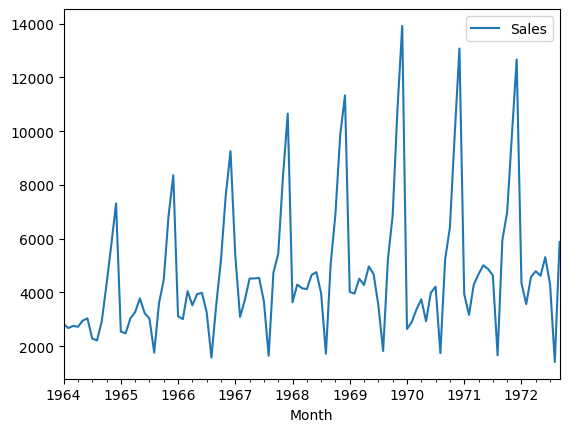

In [21]:
df.plot()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(df['Sales'])

In [24]:
test_result

(-1.8335930563276195,
 0.3639157716602467,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [25]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [26]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [27]:
df['Sales'].shift(12)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
               ...  
1972-05-01    5010.0
1972-06-01    4874.0
1972-07-01    4633.0
1972-08-01    1659.0
1972-09-01    5951.0
Name: Sales, Length: 105, dtype: float64

In [28]:
df.count()

Sales    105
dtype: int64

In [29]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [30]:
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [31]:
df['Sales First Difference'].head(10)

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
1964-06-01      90.0
1964-07-01    -754.0
1964-08-01     -70.0
1964-09-01     710.0
1964-10-01    1379.0
Name: Sales First Difference, dtype: float64

In [32]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [33]:
df.head(10)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [34]:
df.tail(10)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1971-12-01,12670.0,2819.0,-406.0
1972-01-01,4348.0,-8322.0,414.0
1972-02-01,3564.0,-784.0,402.0
1972-03-01,4577.0,1013.0,291.0
1972-04-01,4788.0,211.0,112.0
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0
1972-08-01,1413.0,-2885.0,-246.0


In [35]:
df.shape


(105, 3)

In [36]:
df.isnull().sum()

Sales                         0
Sales First Difference        1
Seasonal First Difference    12
dtype: int64

In [37]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot: xlabel='Month'>

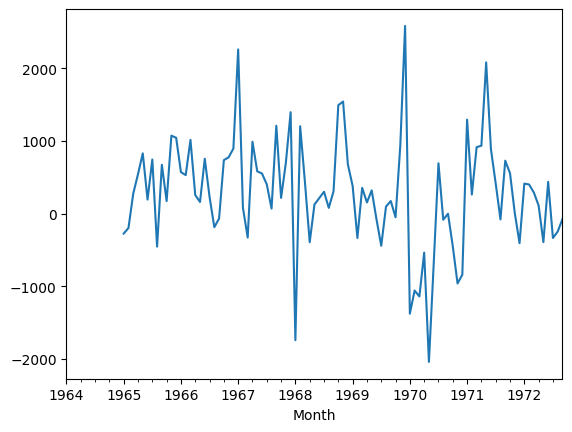

In [38]:
df['Seasonal First Difference'].plot()

In [39]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'